# Market Mix Modelling - Advertising

In [18]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics

In [19]:
# Import .csv
df = pd.read_csv('/Users/maxsmith/Desktop/Coding/Kaggle/Market Mix Modelling - Advertising/Advertising.csv')

In [20]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Brief Exploration

In [21]:
print("Dataset size: ", df.shape)

Dataset size:  (200, 5)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [23]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [24]:
# First column is not of use, so will drop it
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory Data Analysis:

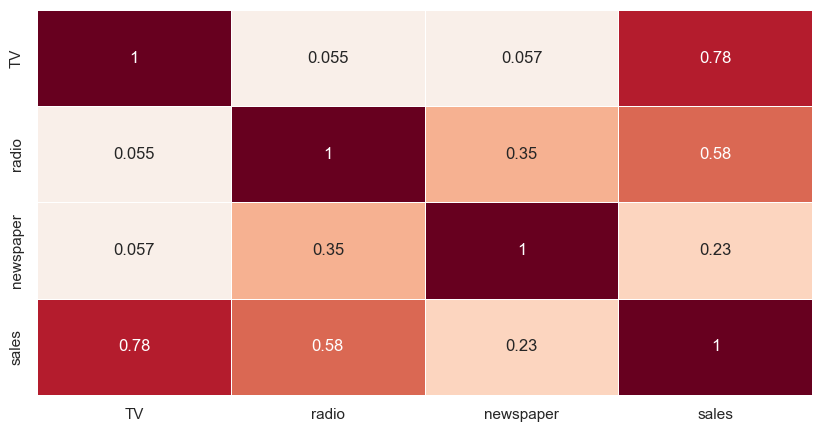

In [25]:
# Correlation Matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap='RdBu_r')
plt.show()

##### From the correlation matrix above, we can state that Sales and TV have a strong correlation (0.78), with Sales and Radio showing a medium correlation (0.58), whereas Sales and Newspaper are highly uncorrelated (0.23)

### Feature Importance

<Axes: >

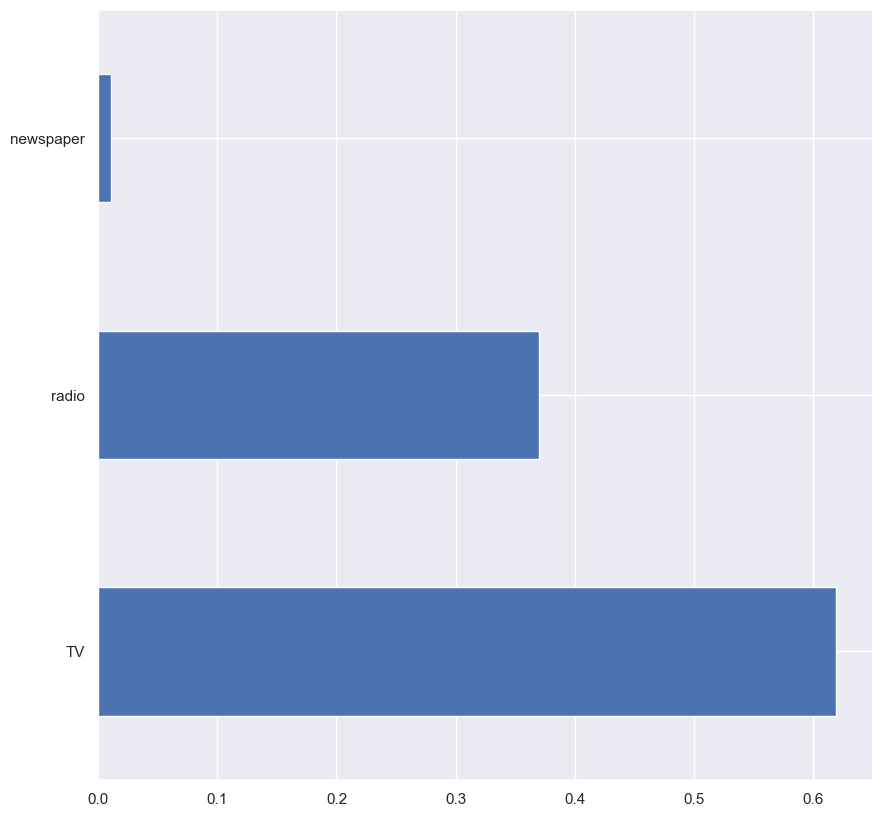

In [26]:
X = df.loc[:, df.columns != 'sales']
y = df['sales']# Building Random Forest model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

##### This confirms the insight gained from the correlation matrix - TV >>> Radio >>> Newspaper

#### Pair Plots

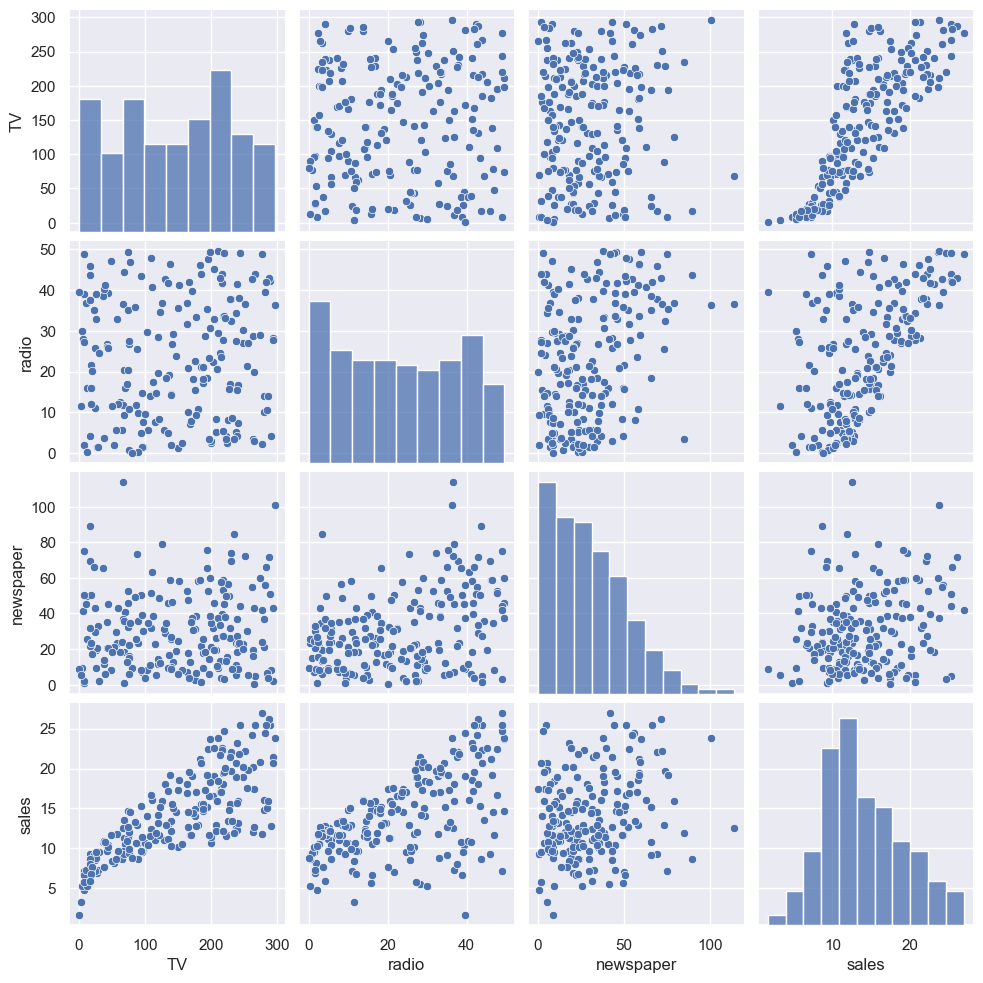

In [27]:
width = 5
height = 8
sns.set(rc = {'figure.figsize':(width, height)})
sns.set(font_scale=1)
sns.pairplot(df)

##### From this plot, we can state that there is observable coherence between our pair plot and the initial correlation matrix. It indicates a robust positive correlation between TV and sales, a comparatively weaker correlation for radio, and an even lesser correlation for newspapers.

##### We can also see that newspaper is right skewed, let's try and unskew it using Box-Cox transformation

#### Box - Cox Transformation

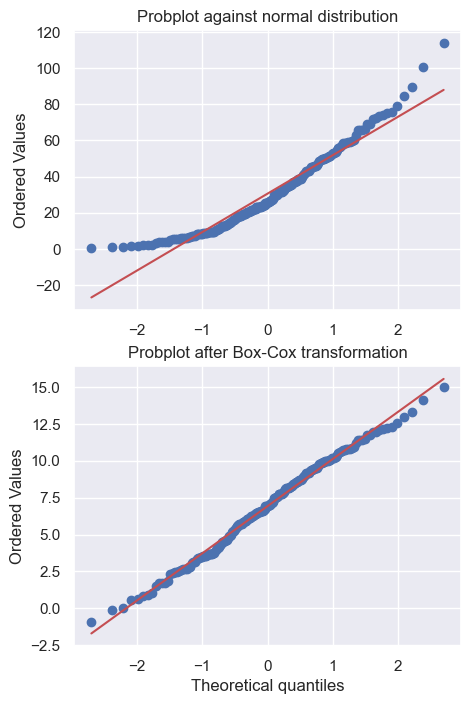

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#Using boxcox to transform the data so it’s closest to normal distribution
ax2 = fig.add_subplot(212)
df['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df['newspaper'], dist=stats.norm, plot=ax2)
print("")
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

#### Post Box-Cox Transformation

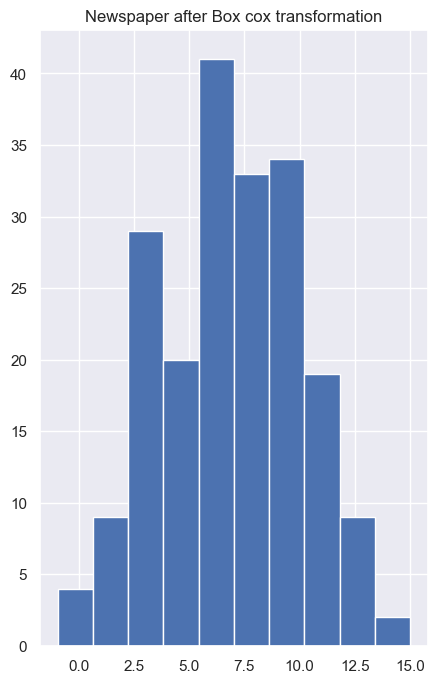

In [29]:
plt.hist(df['newspaper'], bins='auto') 
plt.title("Newspaper after Box cox transformation")
plt.show()

#### We have achieved the transformations, so now we can create the model

### Linear Regression

In [30]:
X = df[["TV","radio",'newspaper']] 
y = df.sales
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

#variable for Linear Regression model
model = LinearRegression()
model.fit(xtrain,ytrain)
model

LinearRegression()

In [31]:
yPred = model.predict(xtest)
yPred

array([11.86798612, 17.75950568,  6.20964555, 14.99377159,  7.40268285,
       17.10835243,  3.57419041,  9.2163039 , 21.33637122, 11.59456028,
       15.62034617, 16.43090294, 24.23091398, 10.52824898, 11.36080883,
       19.30356468, 10.32691698, 16.2775604 , 15.3074286 , 11.45777737,
       17.07046989, 14.90072703, 15.07202357, 21.0142536 , 17.61014715,
        5.1710592 ,  4.61863044, 17.061143  ,  9.41075611, 17.36714493,
        6.63160706,  6.63559793, 10.62183388, 20.37829002, 18.10451656,
       16.88081256, 20.63782976, 18.54881117, 12.04315397, 19.23941178,
       18.47585421,  6.8094959 , 14.69873528, 14.82332966, 21.01569264,
       11.97322867, 12.93556072, 15.3329459 , 23.51270393, 12.9848992 ,
        7.82896049, 22.90773911, 12.4816437 , 23.06306576, 17.23048692,
       23.84889004, 10.7208499 , 15.69595826, 10.25002519, 10.42003403])

In [32]:
result = pd.DataFrame()
result['xtest - tv'] = xtest['TV'].copy()
result['xtest - radio'] = xtest['radio'].copy()
result['ytest'] = ytest.copy()
result['ypred'] = yPred.copy()
result.head()

,xtest - tv,xtest - radio,ytest,ypred
134,36.9,38.6,10.8,11.867986
102,280.2,10.1,14.8,17.759506
106,25.0,11.0,7.2,6.209646
162,188.4,18.1,14.9,14.993772
170,50.0,11.6,8.4,7.402683


### Model Evaluation

##### After running the model, we received the following metrics:

In [33]:
print('MAE : ', metrics.mean_absolute_error(ytest,yPred))
print('MSE : ', metrics.mean_squared_error(ytest,yPred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(ytest,yPred)))
print('R-Squared : ', (metrics.r2_score(ytest,yPred))*100)

MAE :  1.2386062754000813
MSE :  2.441360560238306
RMSE :  1.5624853792078524
R-Squared :  91.96026021208556


##### An R² value of 90.99% indicates that the model provides a very high level of explanatory power, suggesting that the chosen independent variable(s)(in this case, T.V., radio and newspaper) are effective in predicting the variation observed in the dependent variable (sales of the product). This is a strong indication that the model is a good fit for the data, and the explained variability is significantly high.

In [34]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

           Coefficients
TV             0.046077
radio          0.179897
newspaper      0.037130


##### From above, we can build the equation:
##### Sales = 0.045 * T.V. + 0.179* radio + 0.0317 * newspaper

##### The lower coefficient of T.V. might raise questions and it’s possible for a variable with a high correlation to have a lower coefficient in a linear regression equation, and this scenario can occur due to multicollinearity.